In [1]:
import pandas as pd
import seaborn as sns
import re
import language_tool_python
import ast
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import ssl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
tweets = pd.read_csv("tweets_data.csv")
tweets['account.type'] = 'human'
tweets.loc[tweets['isBot'] == 1, 'account.type'] = 'bot'
tweets.drop('isBot', axis = 1, inplace = True)
tweets

,Unnamed: 0,text,account.type
0,0,YEA now that note GOOD,bot
1,1,Listen to This Charming Man by The Smiths htt...,human
2,2,wish i can i would be seeing other hoes on the...,bot
3,3,The decade in the significantly easier schedul...,bot
4,4,"""Theim class=\""alignnone size-full wp-image-60...",bot
...,...,...,...
25567,2553,“The best kept secret,bot
25568,2554,Love the Choose your own adventure style of th...,human
25569,2555,JOIN OUR TEAM: Sneezing,bot
25570,2556,These deeply discounted 256GB SanDisk flash dr...,human


Extracting hashtags and mentions from tweets

In [3]:
tweets['hashtags'] =''
tweets['mentions'] =''
for word in range(len(tweets)):
    tweet = tweets["text"][word]
    tweet.replace('\n', " ")
    word_list = tweet.split(' ')
    regex = "#(\w+)"
    regex2 = "@(\w+)"
    hashtag_list = re.findall(regex, tweet)
    mentions_list = re.findall(regex2, tweet)
    tweets["hashtags"][word] = hashtag_list
    tweets["mentions"][word] = mentions_list

/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_83528/2451328056.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["hashtags"][word] = hashtag_list
/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_83528/2451328056.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["mentions"][word] = mentions_list


In [4]:
tweets

,Unnamed: 0,text,account.type,hashtags,mentions
0,0,YEA now that note GOOD,bot,[],[]
1,1,Listen to This Charming Man by The Smiths htt...,human,[],[]
2,2,wish i can i would be seeing other hoes on the...,bot,[],[]
3,3,The decade in the significantly easier schedul...,bot,[],[]
4,4,"""Theim class=\""alignnone size-full wp-image-60...",bot,[],[]
...,...,...,...,...,...
25567,2553,“The best kept secret,bot,[],[]
25568,2554,Love the Choose your own adventure style of th...,human,[],[]
25569,2555,JOIN OUR TEAM: Sneezing,bot,[],[]
25570,2556,These deeply discounted 256GB SanDisk flash dr...,human,[],[pcworld]


Using 'language_tool_python' to find grammatical errors

In [5]:
tool = language_tool_python.LanguageTool('en-US')
tweets['no_of_grammar_errors'] = ''
for word in range(len(tweets)):
    cap = tweets["text"][word]
    word_list = cap.split(' ')
    tweets['no_of_grammar_errors'][word] = len(tool.check(cap))
tweets

/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_83528/2803298695.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['no_of_grammar_errors'][word] = len(tool.check(cap))


,Unnamed: 0,text,account.type,hashtags,mentions,no_of_grammar_errors
0,0,YEA now that note GOOD,bot,[],[],0
1,1,Listen to This Charming Man by The Smiths htt...,human,[],[],1
2,2,wish i can i would be seeing other hoes on the...,bot,[],[],4
3,3,The decade in the significantly easier schedul...,bot,[],[],0
4,4,"""Theim class=\""alignnone size-full wp-image-60...",bot,[],[],9
...,...,...,...,...,...,...
25567,2553,“The best kept secret,bot,[],[],0
25568,2554,Love the Choose your own adventure style of th...,human,[],[],1
25569,2555,JOIN OUR TEAM: Sneezing,bot,[],[],0
25570,2556,These deeply discounted 256GB SanDisk flash dr...,human,[],[pcworld],2


Extracting number of emojis in tweets

In [7]:
tweets['num_emojis'] = ''
tweets['emojis'] = ''
for word in range(len(tweets)):
    tweet = tweets["text"][word]
    tweet.replace('\n', " ")
    regex = "<U+.*?>"
    emoji_list = re.findall(regex, tweet)
    tweets["num_emojis"][word] = len(emoji_list)
    tweets["emojis"][word] = emoji_list

/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_83528/1574804653.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["num_emojis"][word] = len(emoji_list)
/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_83528/1574804653.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["emojis"][word] = emoji_list


Calculating counts

In [8]:
tweets['mentions_count'] = tweets['mentions'].apply(lambda x: len(x))
tweets['hashtags_count'] = tweets['hashtags'].apply(lambda x: len(x))
human_tweets = tweets[tweets['account.type']== 'human']
bot_tweets = tweets[tweets['account.type']== 'bot']
tweets

,Unnamed: 0,text,account.type,hashtags,mentions,no_of_grammar_errors,num_emojis,emojis,mentions_count,hashtags_count
0,0,YEA now that note GOOD,bot,[],[],0,0,[],0,0
1,1,Listen to This Charming Man by The Smiths htt...,human,[],[],1,0,[],0,0
2,2,wish i can i would be seeing other hoes on the...,bot,[],[],4,0,[],0,0
3,3,The decade in the significantly easier schedul...,bot,[],[],0,0,[],0,0
4,4,"""Theim class=\""alignnone size-full wp-image-60...",bot,[],[],9,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...
25567,2553,“The best kept secret,bot,[],[],0,0,[],0,0
25568,2554,Love the Choose your own adventure style of th...,human,[],[],1,1,[<U+0001F44D>],0,0
25569,2555,JOIN OUR TEAM: Sneezing,bot,[],[],0,0,[],0,0
25570,2556,These deeply discounted 256GB SanDisk flash dr...,human,[],[pcworld],2,0,[],1,0


Grammar Errors

<AxesSubplot:xlabel='account.type', ylabel='no_of_grammar_errors'>

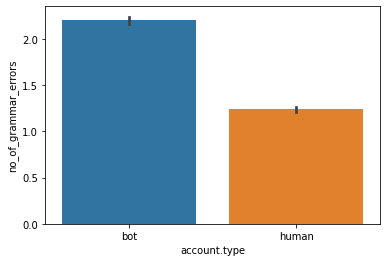

In [9]:
sns.barplot(data=tweets, x="account.type", y="no_of_grammar_errors")

<AxesSubplot:xlabel='account.type', ylabel='no_of_grammar_errors'>

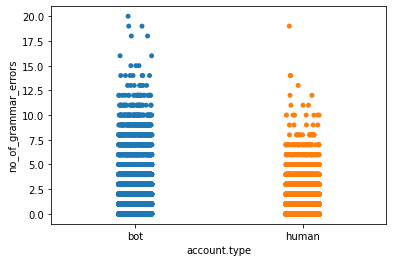

In [10]:
sns.stripplot(data=tweets, x="account.type", y="no_of_grammar_errors")

Mentions

<AxesSubplot:xlabel='account.type', ylabel='mentions_count'>

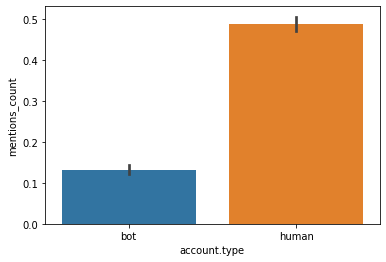

In [11]:
sns.barplot(data=tweets, x="account.type", y="mentions_count")

<AxesSubplot:xlabel='account.type', ylabel='mentions_count'>

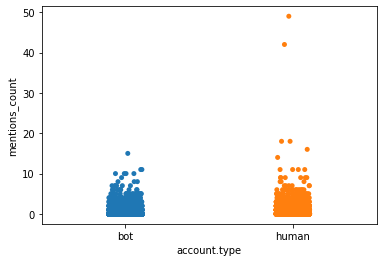

In [12]:
sns.stripplot(data=tweets, x="account.type", y="mentions_count")

Hashtags

<AxesSubplot:xlabel='account.type', ylabel='hashtags_count'>

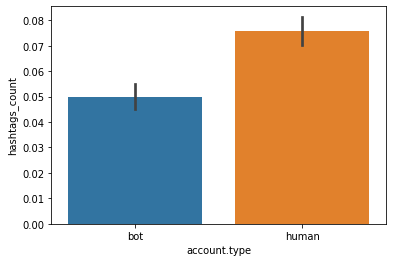

In [13]:
sns.barplot(data=tweets, x="account.type", y="hashtags_count")

<AxesSubplot:xlabel='account.type', ylabel='hashtags_count'>

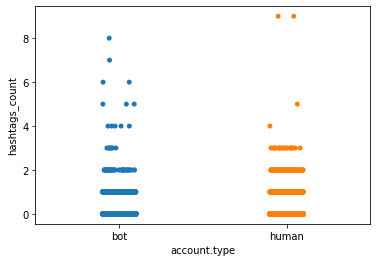

In [14]:
sns.stripplot(data=tweets, x="account.type", y="hashtags_count")

Emojis

<AxesSubplot:xlabel='account.type', ylabel='num_emojis'>

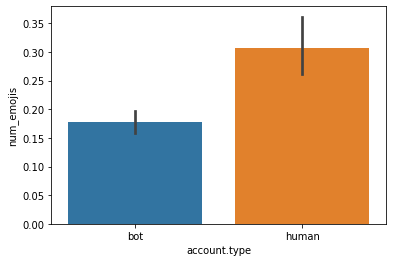

In [15]:
sns.barplot(data=tweets, x="account.type", y="num_emojis")

<AxesSubplot:xlabel='account.type', ylabel='num_emojis'>

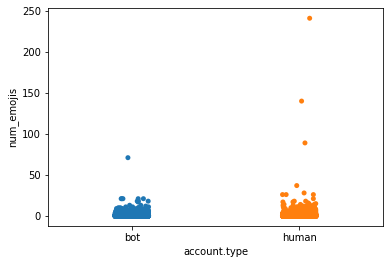

In [16]:
sns.stripplot(data=tweets, x="account.type", y="num_emojis")

Correlation Analysis

/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_83528/1983804177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_tweets['no_of_grammar_errors'] = human_tweets['no_of_grammar_errors'].apply(int)
/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_83528/1983804177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_tweets['num_emojis'] = human_tweets['num_emojis'].apply(int)


<AxesSubplot:>

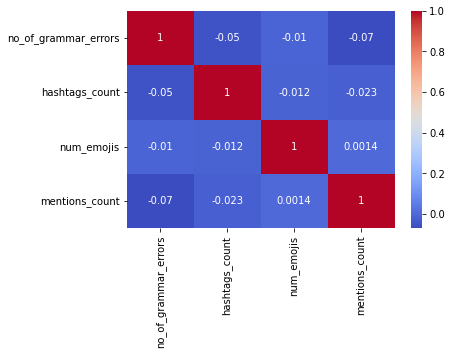

In [17]:
human_tweets['no_of_grammar_errors'] = human_tweets['no_of_grammar_errors'].apply(int)
human_tweets['num_emojis'] = human_tweets['num_emojis'].apply(int)
relevant_values_human = human_tweets[['no_of_grammar_errors','hashtags_count','num_emojis','mentions_count']]
sns.heatmap(relevant_values_human.corr(),cmap ='coolwarm', annot=True,)

/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_83528/4202252154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_tweets['no_of_grammar_errors'] = bot_tweets['no_of_grammar_errors'].apply(int)
/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_83528/4202252154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_tweets['num_emojis'] = bot_tweets['num_emojis'].apply(int)


<AxesSubplot:>

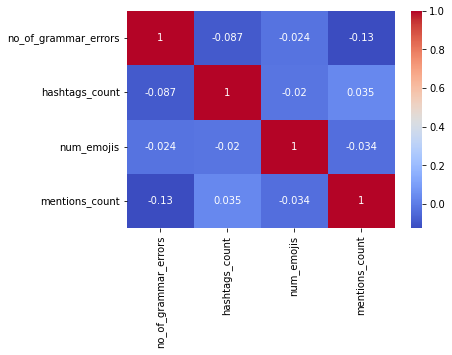

In [18]:
bot_tweets['no_of_grammar_errors'] = bot_tweets['no_of_grammar_errors'].apply(int)
bot_tweets['num_emojis'] = bot_tweets['num_emojis'].apply(int)
relevant_values_bot = bot_tweets[['no_of_grammar_errors','hashtags_count','num_emojis','mentions_count']]
sns.heatmap(relevant_values_bot.corr(),cmap ='coolwarm', annot=True,)

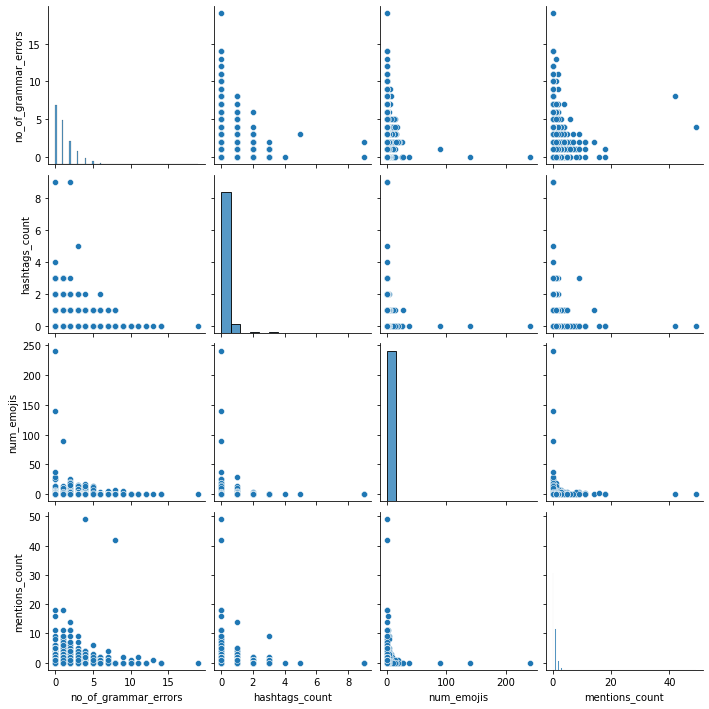

In [19]:
sns.pairplot(relevant_values_human) 

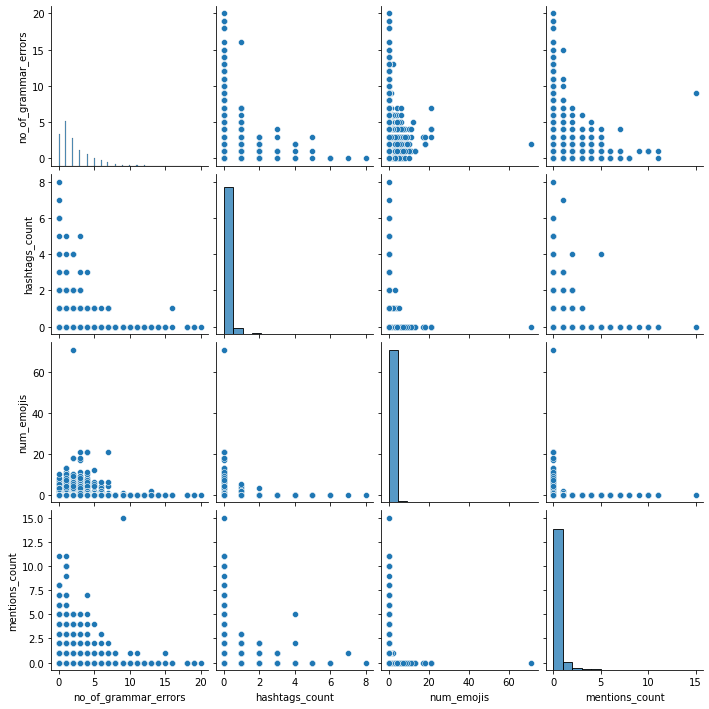

In [20]:
sns.pairplot(relevant_values_bot)

Further preprocessing before using CountVectorizer and TF-IDF

In [23]:
def remove_numbers(df):
    for word in range(len(df)):
        pattern = '[0-9]'
        tweet_clean = df['text'][word].split(' ')
        tweet_clean = [re.sub(pattern, '', i) for i in tweet_clean]
        new_tweet = " ".join(tweet_clean)
        df['text'][word] = new_tweet
    return df
tweets = remove_numbers(tweets)

/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_83528/4156549460.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][word] = new_tweet


In [24]:
bot_tweets = tweets.loc[tweets['account.type'] == 'bot']
human_tweets = tweets.loc[tweets['account.type'] == 'human']
bot_tweets_text = bot_tweets["text"]
human_tweets_text = human_tweets["text"]
human_tweets_text

1        Listen to This Charming Man by The Smiths  htt...
5                                matrix : pedaphile killer
8        nobody:\n\nNSP: penis penis penis penis penis ...
9        Had a wonderful interaction with leaders and M...
11       Heading to Europe to represent our Country and...
                               ...                        
25564    Took stock of the situation in the wake of cyc...
25566    #NowPlaying "Uno Dos (feat. Jaden)" by ¿Téo? i...
25568    Love the Choose your own adventure style of th...
25570    These deeply discounted GB SanDisk flash drive...
25571    @deleonfc diamond pearl and platinum were hone...
Name: text, Length: 12786, dtype: object

In [ ]:

ssl._create_default_https_context = ssl._create_unverified_context

nltk.download('all')

bot_tweets_tokens = []

lemma = WordNetLemmatizer()
for sentence in bot_tweets_text:
    bot_tweets_tokens.append(word_tokenize(sentence))
bot_tweets_tokens_2 = []
for sentence in bot_tweets_tokens:
    sentence2 = []
    for word in sentence:
        if word not in stopwords.words('english'):
            sentence2.append(word)
    bot_tweets_tokens_2.append(sentence2)
bot_tweets_tokens_2
bot_tweets_tokens_3 = []
for sentence in bot_tweets_tokens_2:
    sentence3 = []
    for word in sentence:
        sentence3.append(lemma.lemmatize(word))
    bot_tweets_tokens_3.append(sentence3)
len(bot_tweets_tokens_3)
bot_tweets_tokens_4 = []
for sentence in bot_tweets_tokens_3:
    sentence4 = []
    for word in sentence:
        sentence4.append(PorterStemmer().stem(word))
    bot_tweets_tokens_4.append(sentence4)

In [26]:
human_tweets_tokens = []
for sentence in human_tweets_text:
    human_tweets_tokens.append(word_tokenize(sentence))
human_tweets_tokens_2 = []
for sentence in human_tweets_tokens:
    sentence2 = []
    for word in sentence:
        if word not in stopwords.words('english'):
            sentence2.append(word)
    human_tweets_tokens_2.append(sentence2)
human_tweets_tokens_2
human_tweets_tokens_3 = []
for sentence in human_tweets_tokens_2:
    sentence3 = []
    for word in sentence:
        sentence3.append(lemma.lemmatize(word))
    human_tweets_tokens_3.append(sentence3)
len(human_tweets_tokens_3)
human_tweets_tokens_4 = []
for sentence in human_tweets_tokens_3:
    sentence4 = []
    for word in sentence:
        sentence4.append(PorterStemmer().stem(word))
    human_tweets_tokens_4.append(sentence4)

In [27]:
#print(bot_tweets_tokens_4)
human_tweets_str = []
for i in range(len(human_tweets_tokens_4)):
    human_tweets_str.append(" ".join(human_tweets_tokens_4[i]))
vectorizer = CountVectorizer().fit(human_tweets_str)
human_tweets_tfidf = TfidfTransformer().fit_transform(vectorizer.transform(human_tweets_str))

bot_tweets_str = []
for i in range(len(bot_tweets_tokens_4)):
    bot_tweets_str.append(" ".join(bot_tweets_tokens_4[i]))
bot_tweets_tfidf = TfidfTransformer().fit_transform(vectorizer.transform(bot_tweets_str))
(human_tweets_tfidf, bot_tweets_tfidf)

(<12786x21483 sparse matrix of type '<class 'numpy.float64'>'
 	with 146392 stored elements in Compressed Sparse Row format>,
 <12786x21483 sparse matrix of type '<class 'numpy.float64'>'
 	with 111100 stored elements in Compressed Sparse Row format>)

Compare Vocabulary sizes

In [28]:
human_tweets_str = []
for i in range(len(human_tweets_tokens_4)):
    human_tweets_str.append(" ".join(human_tweets_tokens_4[i]))
human_tweets_countvec = CountVectorizer().fit_transform(human_tweets_str)

bot_tweets_str = []
for i in range(len(bot_tweets_tokens_4)):
    bot_tweets_str.append(" ".join(bot_tweets_tokens_4[i]))
bot_tweets_countvec = CountVectorizer().fit_transform(bot_tweets_str)

(human_tweets_countvec, bot_tweets_countvec)

(<12786x21483 sparse matrix of type '<class 'numpy.int64'>'
 	with 146392 stored elements in Compressed Sparse Row format>,
 <12786x17237 sparse matrix of type '<class 'numpy.int64'>'
 	with 126004 stored elements in Compressed Sparse Row format>)

Dot-Product Similarity Matrices

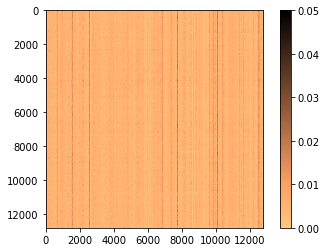

In [29]:
new_matrix = human_tweets_tfidf * csr_matrix.transpose(bot_tweets_tfidf)
new_matrix
fig, ax1 = plt.subplots(1,1)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = ax1.imshow(new_matrix.todense(), cmap="copper_r", vmin=0, vmax = 0.05)
plt.colorbar(im)
plt.show()

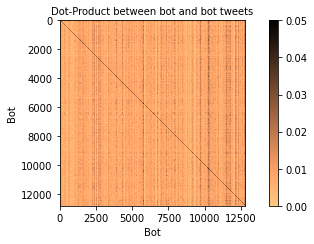

In [30]:
# Dot Product between Bot and Bot Tweets
dot_prod_matrix_bots = bot_tweets_tfidf * csr_matrix.transpose(bot_tweets_tfidf)
# sns.heatmap(dot_prod_matrix_bots.todense(), vmin=0, vmax=0.2)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.title('Dot-Product between bot and bot tweets', fontdict={'fontsize': 10,
 'fontweight' : plt.rcParams['axes.titleweight'],
 'verticalalignment': 'baseline'})
plt.xlabel('Bot')
plt.ylabel('Bot') 
im = plt.imshow(dot_prod_matrix_bots.todense(), cmap="copper_r", vmin=0, vmax = 0.05)
plt.colorbar(im)
plt.show()

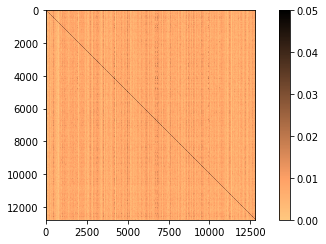

In [31]:
# Dot Product between Human and Human Tweets
dot_prod_matrix_human = human_tweets_tfidf * csr_matrix.transpose(human_tweets_tfidf)
# sns.heatmap(dot_prod_matrix_human.todense(), vmin=0, vmax=0.2)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imshow(dot_prod_matrix_human.todense(), cmap="copper_r", vmin=0, vmax = 0.05)
plt.colorbar(im)
plt.show()

In [39]:
new_matrix

<12786x12786 sparse matrix of type '<class 'numpy.float64'>'
	with 16140876 stored elements in Compressed Sparse Row format>

In [40]:
print("% of zero values in human-human dot product matrix:", (12786*12786 - 16140876) /(12786*12786))
print("% of zero values in bot-bot dot product matrix:", (12786*12786 - 19922196) /(12786*12786))
print("% of zero values in human-bot dot product matrix:", (12786*12786 - 38229905) /(12786*12786))

% of zero values in human-human dot product matrix: 0.9012680531109408
% of zero values in bot-bot dot product matrix: 0.8781381383894266
% of zero values in human-bot dot product matrix: 0.7661519145532265
